In [1]:
%load_ext autoreload
%autoreload 2

import pickle
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Funciones
# -----------------------------------------------------------------------
import sys
sys.path.append('../../')
import src.funciones as f
import src.soporte_prep as spp
import src.soporte_encoding as se
import src.soporte_logistica as sl


# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../../Datos/Datos_Modelo_3/Modelo_3_CL_1.csv', index_col=0) # importo mi modelo más importante
df.head()

,Sales,Quantity,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,Country,Region,Market,Category,Sub-Category,Discount_Category
0,2309.650,1.333333,46.172483,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,182.532253,184.773808,182.532253,400.021358,218.828213,235.316719
1,3709.395,2.000000,45.676969,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,270.879959,266.800494,272.332092,371.369332,387.416057,235.000365
2,2832.960,1.666667,44.650548,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,239.333981,160.771041,160.771041,405.462806,615.178466,235.000365
3,5244.840,1.000000,43.421236,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,213.966975,260.299623,279.198498,370.531832,746.876916,238.030150
4,4164.050,0.666667,41.833998,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,182.721408,209.199795,182.721408,108.037390,86.820739,235.000365


In [3]:
df.describe()

,Sales,Quantity,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,Country,Region,Market,Category,Sub-Category,Discount_Category
count,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000,30723.000000
mean,216.727980,0.142868,0.810270,0.143573,0.052208,0.204798,0.599421,0.508609,0.299808,0.191583,0.075123,0.304560,0.044234,0.576083,216.334024,216.710508,216.719575,216.705487,216.527712,216.738394
std,380.166476,0.752003,2.494847,0.350662,0.222451,0.403560,0.490024,0.499934,0.458181,0.393553,0.263594,0.460228,0.205618,0.494186,66.304278,46.399219,50.422821,136.769485,193.279592,44.184432
min,0.556000,-0.666667,-0.366401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.428000,137.336448,137.336448,108.037390,27.998992,63.667922
25%,29.785000,-0.333333,-0.242273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,182.532253,184.773808,182.721408,109.843474,66.925308,235.000365
50%,80.010000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,210.618124,226.010203,201.854200,110.521039,118.459528,235.316719
75%,232.366500,0.666667,0.757727,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,272.582191,243.909235,269.639457,376.734951,396.113515,238.030150
max,7958.580000,3.666667,46.172483,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1180.440000,324.594199,283.546770,411.758931,762.322845,238.640521


In [4]:
x= df.drop(columns='Sales')
y = df[['Sales']]

In [5]:
def metricas(y_train, y_train_pred, y_test, y_test_pred):
    metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
    }

    return pd.DataFrame(metricas).T

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=42)

In [7]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(x_train, y_train) # aprendizaje

LinearRegression()

In [8]:
y_train_pred = modelo_lineal.predict(x_train)
y_train_pred[:3]

array([[ 13.97215923],
       [-59.78772823],
       [ 82.93419413]])

In [9]:
y_test_pred = modelo_lineal.predict(x_test) # predicciones, con xtest porque xtest son sus parametros. ytest son las respuestas con las que comparemos
y_test_pred[:3]

array([[106.69342065],
       [ -6.3171638 ],
       [469.40973939]])

In [10]:
y_test = np.array(y_test).ravel()
y_test_pred = np.array(y_test_pred).ravel()

In [11]:
metricas(y_train,y_train_pred,y_test,y_test_pred)

,r2_score,MAE,MSE,RMSE
train,0.746379,98.079158,36504.714994,191.062071
test,0.706151,99.188384,42870.505774,207.051940


Text(0, 0.5, 'Predicciones (y_test_pred)')

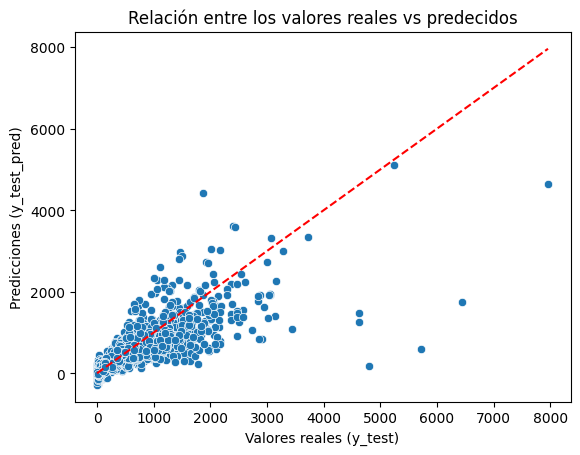

In [12]:
sns.scatterplot(x=y_test, y=y_test_pred)
sns.lineplot(x = [min(y_test), max(y_test)], y = [min(y_test), max(y_test)], markersize = 1, color = "red", linestyle = "--")

plt.title('Relación entre los valores reales vs predecidos')
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Predicciones (y_test_pred)')

## Decision Tree

In [13]:
params_arbol = {
    'max_depth': [4, 7,10,14],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 15, 20, 30],
    'max_leaf_nodes': [6, 8, 10, 20, 30]
}

In [14]:
params_arbol_2 = {
    'max_depth': [6, 7,8,9],
    'min_samples_split': [40,50,60],
    'min_samples_leaf': [18, 20,21],
    'max_leaf_nodes': [25,28,30,32,35]
}

In [15]:
params_arbol_3 = {
    'max_depth': [6, 7,8,9],
    'min_samples_split': [15, 50, 100],
    'min_samples_leaf': [20,30,40],
    'max_leaf_nodes': [32,35,40,42]
}

In [16]:
params_arbol_4 = {
    'max_depth': [3,4,5,6,7],
    'min_samples_split': [15, 50, 100],
    'min_samples_leaf': [20,30,40],
    'max_leaf_nodes': [32,35,40,42]
}

In [17]:
params_arbol_5 = {
    'max_depth': [5,7],
    'min_samples_split': [7,9,10,12],
    'min_samples_leaf': [7,10,12,15],
    'max_leaf_nodes': [38,50,65,100,200]
}

In [18]:
grid_search_arbol = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_5,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 7],
                         'max_leaf_nodes': [38, 50, 65, 100, 200],
                         'min_samples_leaf': [7, 10, 12, 15],
                         'min_samples_split': [7, 9, 10, 12]},
             scoring='neg_mean_squared_error')

In [19]:
modelo_final_arbol = grid_search_arbol.best_estimator_

In [20]:
modelo_final_arbol

DecisionTreeRegressor(max_depth=7, max_leaf_nodes=200, min_samples_leaf=7,
                      min_samples_split=7)

In [21]:
y_test_pred_final = modelo_final_arbol.predict(x_test)
y_train_pred_final = modelo_final_arbol.predict(x_train)

In [22]:
df_metricas_arbol = metricas(y_train, y_train_pred_final, y_test, y_test_pred_final)

In [23]:
df_metricas_arbol

,r2_score,MAE,MSE,RMSE
train,0.87302,61.400169,18276.754051,135.191546
test,0.77144,67.538509,33345.264350,182.606857


In [24]:
df_resultados_arbol = pd.DataFrame(grid_search_arbol.cv_results_).sort_values(by = 'rank_test_score', ascending=True)
df_resultados_arbol.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
144,0.449607,0.070555,0.029099,0.023633,7,200,7,7,"{'max_depth': 7, 'max_leaf_nodes': 200, 'min_s...",-29115.790059,-26831.364927,-19114.672205,-24952.044173,-19819.574857,-23966.689244,3909.761051,1
147,0.289505,0.066509,0.008061,0.001628,7,200,7,12,"{'max_depth': 7, 'max_leaf_nodes': 200, 'min_s...",-29115.790059,-26831.364927,-19114.672205,-24952.044173,-19819.574857,-23966.689244,3909.761051,2
146,0.323169,0.102225,0.035442,0.038682,7,200,7,10,"{'max_depth': 7, 'max_leaf_nodes': 200, 'min_s...",-29115.790059,-26831.364927,-19114.672205,-24952.044173,-19819.574857,-23966.689244,3909.761051,3
145,0.394175,0.091889,0.007732,0.002750,7,200,7,9,"{'max_depth': 7, 'max_leaf_nodes': 200, 'min_s...",-29115.790059,-26831.364927,-19114.672205,-24952.044173,-19819.574857,-23966.689244,3909.761051,3
130,0.409061,0.073618,0.008749,0.002389,7,100,7,10,"{'max_depth': 7, 'max_leaf_nodes': 100, 'min_s...",-29166.675961,-26856.379989,-19110.197287,-25014.859285,-19884.181628,-24006.458830,3917.481573,5
128,0.346145,0.107134,0.019640,0.012697,7,100,7,7,"{'max_depth': 7, 'max_leaf_nodes': 100, 'min_s...",-29166.675961,-26856.379989,-19110.197287,-25014.859285,-19884.181628,-24006.458830,3917.481573,6
131,0.294644,0.056561,0.011274,0.006788,7,100,7,12,"{'max_depth': 7, 'max_leaf_nodes': 100, 'min_s...",-29166.675961,-26856.379989,-19110.197287,-25014.859285,-19884.181628,-24006.458830,3917.481573,7
129,0.382434,0.075578,0.009856,0.005091,7,100,7,9,"{'max_depth': 7, 'max_leaf_nodes': 100, 'min_s...",-29166.675961,-26856.379989,-19110.197287,-25014.859285,-19884.181628,-24006.458830,3917.481573,7
151,0.222302,0.099026,0.012080,0.008608,7,200,10,12,"{'max_depth': 7, 'max_leaf_nodes': 200, 'min_s...",-28548.898132,-27006.649934,-20130.343532,-24908.245887,-19484.924489,-24015.812395,3630.873904,9
150,0.183955,0.043914,0.006039,0.000835,7,200,10,10,"{'max_depth': 7, 'max_leaf_nodes': 200, 'min_s...",-28548.898132,-27006.649934,-20130.343532,-24908.245887,-19484.924489,-24015.812395,3630.873904,9


In [25]:
df_resultados_arbol_filtrado = df_resultados_arbol.filter(like='param').drop(columns='params')
df_resultados_arbol_filtrado['MSE'] = df_resultados_arbol['mean_test_score']
df_resultados_arbol_filtrado

,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
144,7,200,7,7,-23966.689244
147,7,200,7,12,-23966.689244
146,7,200,7,10,-23966.689244
145,7,200,7,9,-23966.689244
130,7,100,7,10,-24006.458830
...,...,...,...,...,...
58,5,100,12,10,-28181.443559
57,5,100,12,9,-28181.443559
56,5,100,12,7,-28181.443559
11,5,38,12,12,-28181.443559


In [26]:
df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby('param_max_depth')['MSE'].mean().abs()).reset_index()

In [27]:
df_rmse_prof

,param_max_depth,MSE
0,5,167.199817
1,7,157.237312


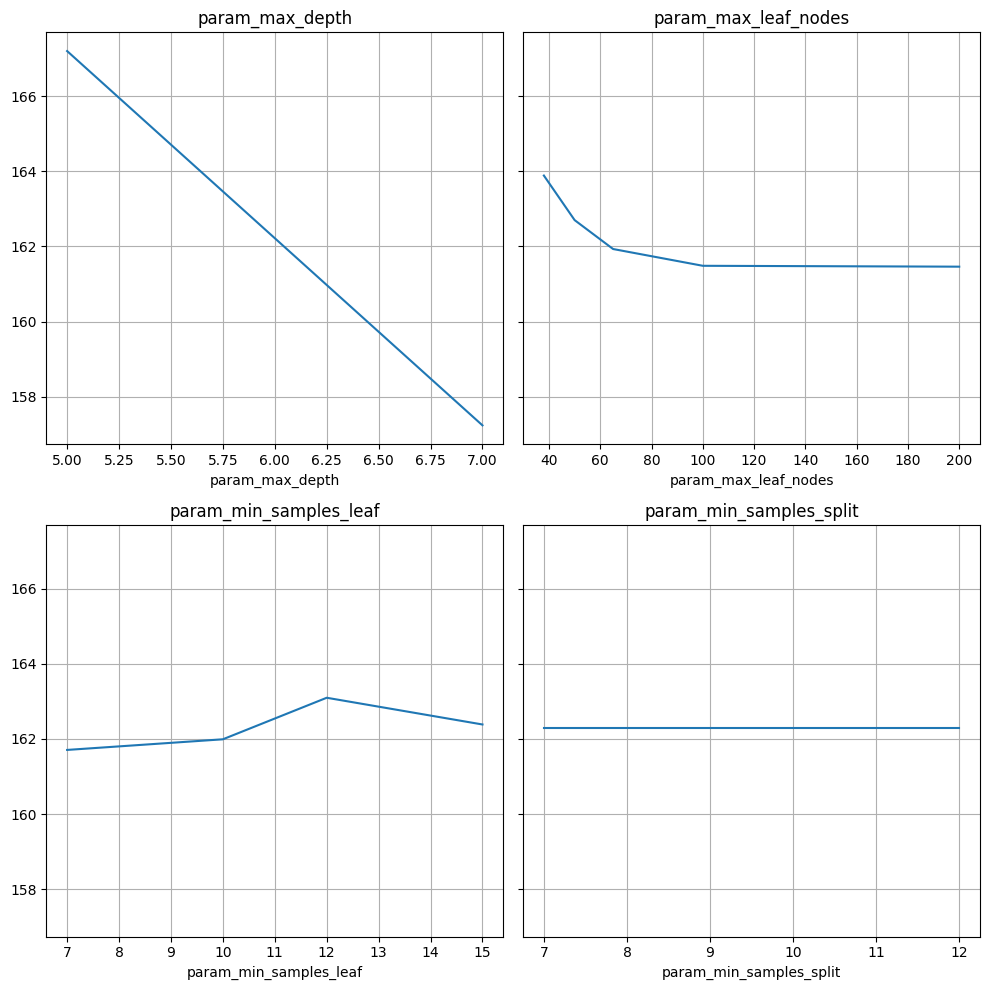

In [28]:
# df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby("param_max_depth")["MSE"].mean().abs())
# df_rmse_prof = pd.DataFrame(df_rmse_prof).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado.columns[:-1]):
    # Asegurarse de no exceder el número de subgráficos
    if indice >= len(axes):
        break

    df_rmse_col = np.sqrt(df_resultados_arbol_filtrado.groupby(column)["MSE"].mean().abs())

    sns.lineplot(x=df_rmse_col.index, y=df_rmse_col.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)

plt.tight_layout()
plt.show() 

In [29]:
df_importancia = pd.DataFrame(modelo_final_arbol.feature_importances_,columns = ['Importancia'], index=x.columns).sort_values(by='Importancia', ascending=False)

<Axes: xlabel='Importancia', ylabel='None'>

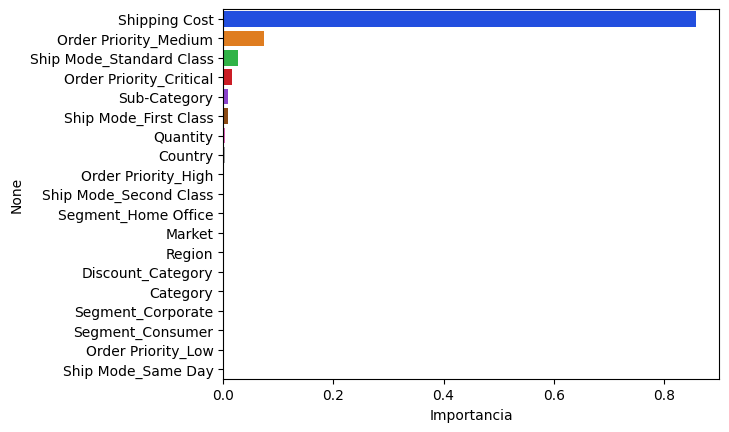

In [30]:
sns.barplot(x='Importancia', y=df_importancia.index ,data=df_importancia, palette='bright')

## Random Forest

In [31]:
params_rrf = {
    'n_estimators': [250, 300],
    'max_features': [4,8,10],
    'max_depth': [6,7],
    'min_samples_split': [7,9,10],
    'min_samples_leaf': [7,9], 
    'max_leaf_nodes': [200,300]
}

modelo_rrf = RandomForestRegressor(random_state=42, bootstrap=True,n_jobs=-1) # por este método nos pide un array

randonmized_rrf = RandomizedSearchCV(modelo_rrf, # solo hace las iteraciones que le digo
                              params_rrf,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              random_state=50, #semilla
                              n_iter=10,
                              verbose=10)

randonmized_rrf.fit(x_train, y_train['Sales'].values) # array de una dim
modelo_final_rrf = randonmized_rrf.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [32]:
modelo_final_rrf

RandomForestRegressor(max_depth=7, max_features=10, max_leaf_nodes=200,
                      min_samples_leaf=9, min_samples_split=7, n_estimators=300,
                      n_jobs=-1, random_state=42)

In [33]:
y_pred_test_rrf = modelo_final_rrf.predict(x_test)
y_pred_train_rrf = modelo_final_rrf.predict(x_train)
df_metricas_rrf = metricas(y_train, y_pred_train_rrf, y_test, y_pred_test_rrf)
df_metricas_rrf

,r2_score,MAE,MSE,RMSE
train,0.876924,58.308053,17714.836379,133.097094
test,0.791442,63.950993,30427.106658,174.433674


Mejor modelo

### Random Distinto

In [34]:
params_rf = {
    'n_estimators': [225,250,300],
    'max_features': [4,8,10],
    'max_depth': [5,7,9],
    'min_samples_split': [7,9,10],
    'min_samples_leaf': [7,9], 
    'max_leaf_nodes': [50,200]
}

modelo_rf = RandomForestRegressor(random_state=42, bootstrap=True) # por este método nos pide un array

grid_search_rf = GridSearchCV(modelo_rf,
                              params_rf,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              )

grid_search_rf.fit(x_train, y_train['Sales'].values) # array de una dim
modelo_final_rf = grid_search_rf.best_estimator_

In [35]:
modelo_final_rf

RandomForestRegressor(max_depth=9, max_features=10, max_leaf_nodes=200,
                      min_samples_leaf=7, min_samples_split=7, n_estimators=300,
                      random_state=42)

In [36]:
y_pred_test_rf = modelo_final_rf.predict(x_test)
y_pred_train_rf = modelo_final_rf.predict(x_train)
df_metricas_rf = metricas(y_train, y_pred_train_rf, y_test, y_pred_test_rf)
df_metricas_rf

,r2_score,MAE,MSE,RMSE
train,0.895981,53.969396,14971.885921,122.359658
test,0.798435,62.152162,29406.837268,171.484219


## Gradient Booster

In [37]:
params_gb = {
    'n_estimators': [200,300],
    'learning_rate': [0.01,0.1,0.2],
    'max_depth': [3,5,7],
    'min_samples_split': [7,9,10,100],
    'min_samples_leaf': [7,9,20], 
}

modelo_gb = GradientBoostingRegressor(random_state=42) # por este método nos pide un array

grid_search_gb = GridSearchCV(modelo_gb,
                              params_gb,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_gb.fit(x_train, y_train['Sales'].values) # array de una dim
modelo_final_gb = grid_search_gb.best_estimator_

In [38]:
modelo_final_gb

GradientBoostingRegressor(max_depth=5, min_samples_leaf=20,
                          min_samples_split=100, n_estimators=200,
                          random_state=42)

In [39]:
y_pred_test_gb = modelo_final_gb.predict(x_test)
y_pred_train_gb = modelo_final_gb.predict(x_train)
df_metricas_gb = metricas(y_train, y_pred_train_gb, y_test, y_pred_test_gb)
df_metricas_gb

,r2_score,MAE,MSE,RMSE
train,0.906803,52.641181,13414.232547,115.819828
test,0.809951,60.437984,27726.802099,166.513669


## XGB

In [40]:
params_xgb = {
    'n_estimators': [70],
    'learning_rate': [0.01, 0.05,0.1],
    'max_depth': [3],
    'min_child_weight': [6,7],
    'subsample': [0.8], 
    'colsample_bytree': [0.25]
}

modelo_xgb = XGBRegressor(random_state=42) # por este método nos pide un array

grid_search_xgb = GridSearchCV(modelo_xgb,
                              params_xgb,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_xgb.fit(x_train, y_train['Sales'].values) # array de una dim
modelo_final_xgb = grid_search_xgb.best_estimator_

In [41]:
modelo_final_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.25, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=70, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [42]:
y_pred_test_xgb = modelo_final_xgb.predict(x_test)
y_pred_train_xgb = modelo_final_xgb.predict(x_train)
df_metricas_xgb = metricas(y_train, y_pred_train_xgb, y_test, y_pred_test_xgb)
df_metricas_xgb

,r2_score,MAE,MSE,RMSE
train,0.795109,82.705826,29490.792945,171.728836
test,0.728585,85.686219,39597.480254,198.991156
